<a href="https://colab.research.google.com/github/eeolga/deep/blob/main/Lesson6_Model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let's add some data
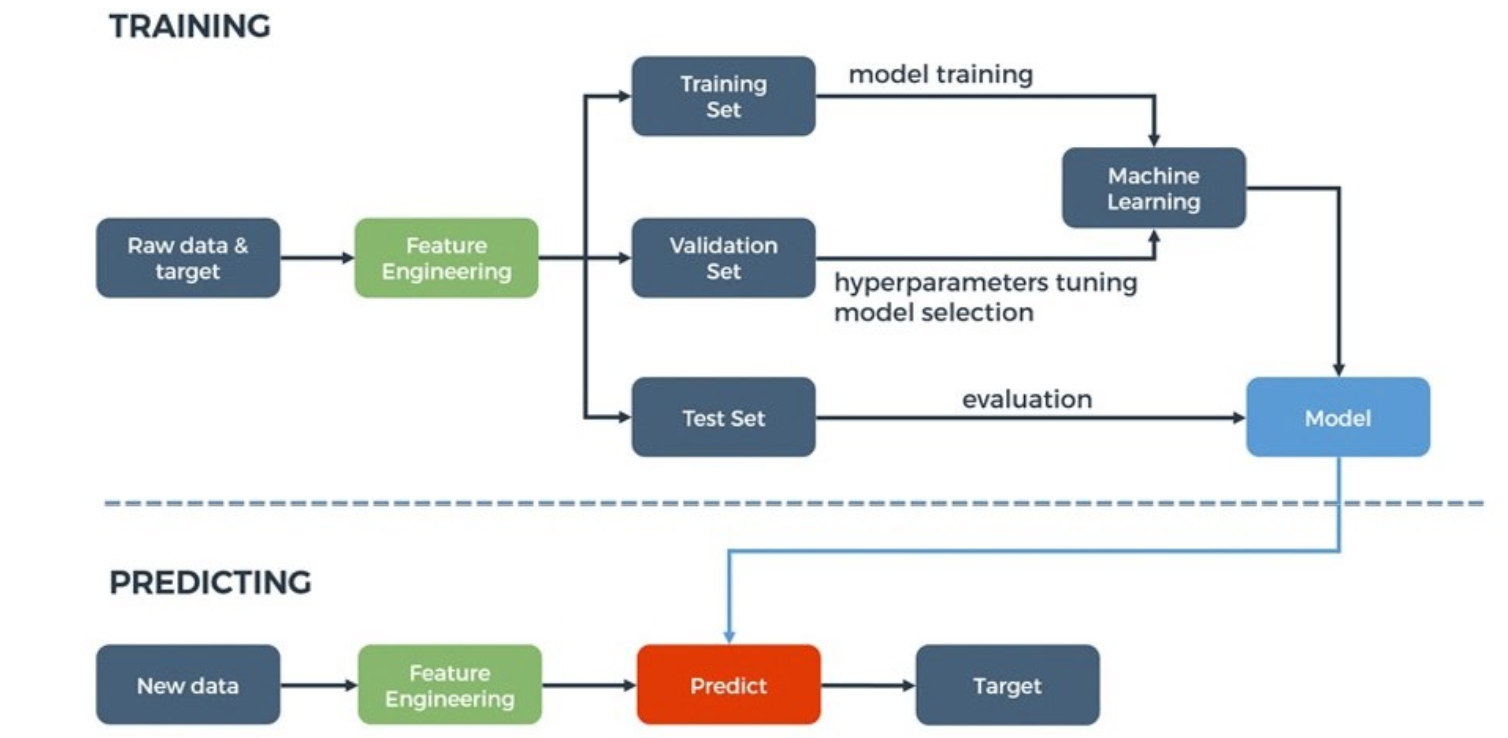

In [1]:
import numpy as np
import torch

In [2]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = (35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4)

In [3]:
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

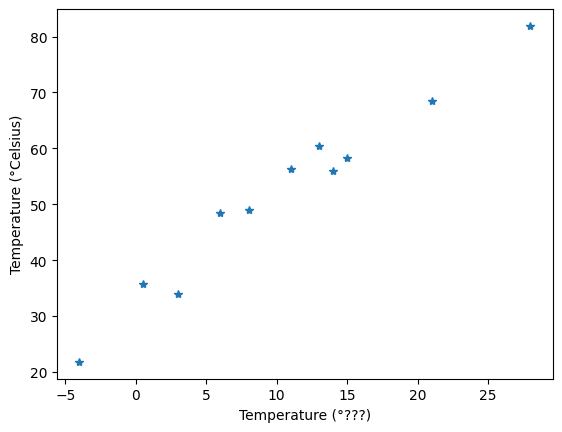

In [4]:
%matplotlib inline
from matplotlib import pyplot as plt

fig = plt.figure(dpi=100)
plt.xlabel("Temperature (°???)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_c, t_u, '*')

MODEL

t_c=w*t_u+b

In [5]:
def model(t_u, w, b): return w *t_u+ b #(w - weight, b-bTas)

In [6]:
def loss_fn(t_p, t_c):
    squared_diffs =(t_p - t_c)**2
    return squared_diffs.mean()

In [7]:
w=torch.ones(())
b=torch.zeros(())

t_p = model(t_u, w, b)
t_p

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])

In [8]:
loss= loss_fn(t_p, t_c)
loss

tensor(1763.8848)

In [9]:
delta=0.1 # gradient descent

In [10]:
loss_rate_of_change_w = \
    (loss_fn(model(t_u, w + delta, b), t_c) - loss_fn(model(t_u, w - delta, b), t_c))/ (2.0 *delta)

In [11]:
learning_rate=1e-2

In [12]:
w=w - learning_rate * loss_rate_of_change_w

In [13]:
loss_rate_of_change_b=\
    (loss_fn(model(t_u, w, b + delta), t_c) -
    loss_fn(model(t_u, w, b - delta), t_c))/ (2.0*delta)

b=b-learning_rate*loss_rate_of_change_b

In [14]:
def dloss_fn(t_p, t_c): #derivate of loss is computed
    dsq_diffs = 2 *(t_p - t_c) / t_p.size(0)
    return dsq_diffs

In [15]:
def dmodel_dw(t_u,w,b):
   return t_u

In [16]:
def dmodel_db(t_u,w,b):
   return 1.0

gradient

In [17]:
def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w, b)
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])

iterating to fit

In [18]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c, print_params=True):
   for epoch in range(1, n_epochs + 1):
        w, b = params

        t_p = model(t_u, w, b) # Forward pass
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w, b) # backward pass

        params = params-learning_rate*grad
        print('Epoch %d, Loss %f' % (epoch, float(loss)))
   return params

In [19]:
training_loop( n_epochs = 100, learning_rate = 1e-4, params =torch.tensor([1.0, 0.0]),t_u = t_u,t_c=t_c)

Epoch 1, Loss 1763.884766
Epoch 2, Loss 323.090515
Epoch 3, Loss 78.929634
Epoch 4, Loss 37.552845
Epoch 5, Loss 30.540283
Epoch 6, Loss 29.351154
Epoch 7, Loss 29.148884
Epoch 8, Loss 29.113848
Epoch 9, Loss 29.107145
Epoch 10, Loss 29.105247
Epoch 11, Loss 29.104168
Epoch 12, Loss 29.103222
Epoch 13, Loss 29.102295
Epoch 14, Loss 29.101379
Epoch 15, Loss 29.100466
Epoch 16, Loss 29.099548
Epoch 17, Loss 29.098631
Epoch 18, Loss 29.097717
Epoch 19, Loss 29.096796
Epoch 20, Loss 29.095881
Epoch 21, Loss 29.094959
Epoch 22, Loss 29.094049
Epoch 23, Loss 29.093134
Epoch 24, Loss 29.092216
Epoch 25, Loss 29.091301
Epoch 26, Loss 29.090385
Epoch 27, Loss 29.089464
Epoch 28, Loss 29.088551
Epoch 29, Loss 29.087635
Epoch 30, Loss 29.086714
Epoch 31, Loss 29.085804
Epoch 32, Loss 29.084888
Epoch 33, Loss 29.083967
Epoch 34, Loss 29.083057
Epoch 35, Loss 29.082142
Epoch 36, Loss 29.081221
Epoch 37, Loss 29.080309
Epoch 38, Loss 29.079390
Epoch 39, Loss 29.078474
Epoch 40, Loss 29.077562
Epoch 

tensor([ 0.2327, -0.0438])

normalizing input

In [20]:
t_un = 0.1 *t_u

In [21]:
training_loop(n_epochs = 100, learning_rate = 1e-2, params =torch.tensor([1.0, 0.0]),t_u = t_un,t_c = t_c)

Epoch 1, Loss 80.364342
Epoch 2, Loss 37.574913
Epoch 3, Loss 30.871077
Epoch 4, Loss 29.756193
Epoch 5, Loss 29.507153
Epoch 6, Loss 29.392456
Epoch 7, Loss 29.298828
Epoch 8, Loss 29.208717
Epoch 9, Loss 29.119415
Epoch 10, Loss 29.030489
Epoch 11, Loss 28.941877
Epoch 12, Loss 28.853565
Epoch 13, Loss 28.765553
Epoch 14, Loss 28.677851
Epoch 15, Loss 28.590431
Epoch 16, Loss 28.503319
Epoch 17, Loss 28.416498
Epoch 18, Loss 28.329973
Epoch 19, Loss 28.243742
Epoch 20, Loss 28.157804
Epoch 21, Loss 28.072151
Epoch 22, Loss 27.986797
Epoch 23, Loss 27.901728
Epoch 24, Loss 27.816950
Epoch 25, Loss 27.732464
Epoch 26, Loss 27.648256
Epoch 27, Loss 27.564344
Epoch 28, Loss 27.480707
Epoch 29, Loss 27.397362
Epoch 30, Loss 27.314295
Epoch 31, Loss 27.231512
Epoch 32, Loss 27.149010
Epoch 33, Loss 27.066790
Epoch 34, Loss 26.984844
Epoch 35, Loss 26.903175
Epoch 36, Loss 26.821791
Epoch 37, Loss 26.740679
Epoch 38, Loss 26.659838
Epoch 39, Loss 26.579279
Epoch 40, Loss 26.498987
Epoch 41,

tensor([ 2.7553, -2.5162])

In [22]:
training_loop(n_epochs = 500, learning_rate = 1e-2, params =torch.tensor([1.0, 0.0]),t_u = t_un,t_c = t_c)

Epoch 1, Loss 80.364342
Epoch 2, Loss 37.574913
Epoch 3, Loss 30.871077
Epoch 4, Loss 29.756193
Epoch 5, Loss 29.507153
Epoch 6, Loss 29.392456
Epoch 7, Loss 29.298828
Epoch 8, Loss 29.208717
Epoch 9, Loss 29.119415
Epoch 10, Loss 29.030489
Epoch 11, Loss 28.941877
Epoch 12, Loss 28.853565
Epoch 13, Loss 28.765553
Epoch 14, Loss 28.677851
Epoch 15, Loss 28.590431
Epoch 16, Loss 28.503319
Epoch 17, Loss 28.416498
Epoch 18, Loss 28.329973
Epoch 19, Loss 28.243742
Epoch 20, Loss 28.157804
Epoch 21, Loss 28.072151
Epoch 22, Loss 27.986797
Epoch 23, Loss 27.901728
Epoch 24, Loss 27.816950
Epoch 25, Loss 27.732464
Epoch 26, Loss 27.648256
Epoch 27, Loss 27.564344
Epoch 28, Loss 27.480707
Epoch 29, Loss 27.397362
Epoch 30, Loss 27.314295
Epoch 31, Loss 27.231512
Epoch 32, Loss 27.149010
Epoch 33, Loss 27.066790
Epoch 34, Loss 26.984844
Epoch 35, Loss 26.903175
Epoch 36, Loss 26.821791
Epoch 37, Loss 26.740679
Epoch 38, Loss 26.659838
Epoch 39, Loss 26.579279
Epoch 40, Loss 26.498987
Epoch 41,

tensor([ 4.0443, -9.8133])

In [23]:
training_loop(n_epochs = 1000, learning_rate = 1e-4, params =torch.tensor([1.0, 0.0]),t_u = t_un,t_c = t_c)

Epoch 1, Loss 80.364342
Epoch 2, Loss 79.752480
Epoch 3, Loss 79.148026
Epoch 4, Loss 78.550865
Epoch 5, Loss 77.960899
Epoch 6, Loss 77.378052
Epoch 7, Loss 76.802254
Epoch 8, Loss 76.233406
Epoch 9, Loss 75.671425
Epoch 10, Loss 75.116219
Epoch 11, Loss 74.567734
Epoch 12, Loss 74.025856
Epoch 13, Loss 73.490532
Epoch 14, Loss 72.961662
Epoch 15, Loss 72.439178
Epoch 16, Loss 71.923004
Epoch 17, Loss 71.413055
Epoch 18, Loss 70.909271
Epoch 19, Loss 70.411568
Epoch 20, Loss 69.919861
Epoch 21, Loss 69.434097
Epoch 22, Loss 68.954185
Epoch 23, Loss 68.480080
Epoch 24, Loss 68.011688
Epoch 25, Loss 67.548958
Epoch 26, Loss 67.091805
Epoch 27, Loss 66.640167
Epoch 28, Loss 66.193993
Epoch 29, Loss 65.753181
Epoch 30, Loss 65.317703
Epoch 31, Loss 64.887482
Epoch 32, Loss 64.462448
Epoch 33, Loss 64.042534
Epoch 34, Loss 63.627697
Epoch 35, Loss 63.217857
Epoch 36, Loss 62.812977
Epoch 37, Loss 62.412975
Epoch 38, Loss 62.017799
Epoch 39, Loss 61.627377
Epoch 40, Loss 61.241684
Epoch 41,

tensor([ 2.3204, -0.0712])

Autogradient

In [24]:
t_c = ([0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0])
t_u = (35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4)
t_u = 0.1* t_un

In [25]:
def model(t_u, w, b):
    return w *t_u + b

In [30]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [27]:
params = torch.tensor ( [ 1.0 , 0.0 ] , requires_grad=True)

In [28]:
params.grad is None

True

In [ ]:
loss = loss_fn (model(t_u, *params), t_c)
loss.backward()

params.grad

In [32]:
if params.grad is not None:
  params. grad. zero_ ()

In [33]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c) :
    for epoch in range(1, n_epochs + 1):
        if params.grad is not None:
           params. grad. zero ()
        t_p = model(t_u, *params)
        loss= loss_fn(t_p, t_c)
        loss.backward ()

        with torch.no_grad():
             params -= learning_rate * params.grad

        if epoch% 500 == 0:
           print('Epoch %d, Loss %f' % (epoch, float(loss)))
    return params

In [ ]:
training_loop(
n_epochs = 5000,
learning_rate = 1e-2,
params = torch.tensor([1.0,0.0], requires_grad=True),
t_u = t_un,
t_c = t_c)

In [36]:
import torch.optim as optim

In [37]:
dir(optim)

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'NAdam',
 'Optimizer',
 'RAdam',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional',
 '_multi_tensor',
 'lr_scheduler',
 'swa_utils']

In [38]:
params = torch.tensor( [ 1.0 , 0.0 ] , requires_grad=True)

In [39]:
learning_rate = 1e-5

In [40]:
optimizer = optim.SGD ( [params],lr= learning_rate)

In [41]:
t_p = model(t_u, *params)

In [ ]:
loss = loss_fn(t_p, t_c)

In [ ]:
loss.backward ()

In [44]:
optimizer.step()

In [45]:
params

tensor([1., 0.], requires_grad=True)

In [ ]:
params=torch.tensor([1.0,0.0], requires_grad=True)
learning_rate=1e-2
optimizer=optim.SGD([params], lr=learning_rate)

t_p=model(t_un,*params)
loss=loss_fn(t_p, t_c)

optimizer.zero_grad()
loss.backward()
optimizer.step()

params

In [47]:
def training_loop(n_epochs, optimizer, params,t_u, t_c) :
     for epoch in range(1, n_epochs + 1):
      t_p = model(t_u, *params)
      loss=loss_fn(t_p, t_c)

      optimizer.zero_grad()
      loss. backward ()

      if epoch% 500 == 0:
         print ('Epoch )%d , Loss %f' % (epoch, float(loss)))
     return params

In [ ]:
params = torch. tensor ([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim. SGD ([params], lr= learning_rate)

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    params = params,
    t_u = t_u,
    t_c = t_c)

In [ ]:
params = torch. tensor ([1.0, 0.0], requires_grad=True)
learning_rate = 1e-1
optimizer = optim. Adam ([params], lr= learning_rate)

training_loop(
    n_epochs = 2000,
    optimizer = optimizer,
    params = params,
    t_u = t_u,
    t_c = t_c)

In [ ]:
n_samples = t_u.shape[O]
n_val = int(0.2 * n_samples)

shuffled_indices =torch.randperm(n_samples)
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]
train_indices, val_indices

In [ ]:
train_t_u=t_u[train_indices]
train_t_c=t_c[train_indices]

In [ ]:
val_t_u=t_u[val_indices]
val_t_c=t_c[val_indices]

In [ ]:
train_t_un=0.1*train_t_u
val_t_un=0.1*val_t_u